In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
feature_names = ['description_hamming_distance', 'published_hamming_distance', 'author_hamming_distance', 'title_hamming_distance']

In [3]:
# kilmer_df = pd.read_csv('kilmer_with_duplicates' + '_with_hashes.csv', usecols=feature_names + ['has_duplicate'])

In [4]:
# science_df = pd.read_csv('science_with_duplicates' + '_with_hashes.csv', usecols=feature_names + ['has_duplicate'])

In [5]:
# df = pd.concat([kilmer_df, science_df])

In [6]:
df = pd.read_csv('combined' + '_with_hashes.csv', usecols=feature_names + ['has_duplicate'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['has_duplicate'], random_state=0)

In [8]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0, splitter = "random")

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0, splitter='random')

In [10]:
predictions = clf.predict(X_test[0:])

In [11]:
score = clf.score(X_test, y_test)
# "mean accuracy on the given test data and labels"
print(score)

0.78


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)

0.78

In [13]:
from sklearn.metrics import check_scoring

scorer = check_scoring(clf, scoring='accuracy')
scorer(clf, X_test, y_test)

0.78

In [14]:
scorer = check_scoring(clf, scoring='precision')
scorer(clf, X_test, y_test)

np.float64(0.8181818181818182)

In [15]:
df_for_scoring = y_test.to_frame()

In [16]:
df_for_scoring['dup_predicted'] = predictions

In [18]:
true_positive = df_for_scoring.query('has_duplicate == True and dup_predicted == True').shape[0]
true_positive

9

In [19]:
true_negative = df_for_scoring.query('has_duplicate == False and dup_predicted == False').shape[0]
true_negative

30

In [20]:
false_positive = df_for_scoring.query('has_duplicate == False and dup_predicted == True').shape[0]
false_positive

2

In [21]:
false_negative = df_for_scoring.query('has_duplicate == True and dup_predicted == False').shape[0]
false_negative

9

In [22]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
format(accuracy, ".0%")

'78%'

In [23]:
misclassification = (false_positive + false_negative) / (true_positive + true_negative + false_positive + false_negative)
format(misclassification, ".0%")

'22%'

In [24]:
precision = true_positive / (true_positive + false_positive)
format(precision, ".0%")

'82%'

In [25]:
sensitivity = true_positive / (true_positive + false_negative)
format(sensitivity, ".0%")

'50%'

In [26]:
specificity = true_negative / (true_negative + false_positive)
format(specificity, ".0%")

'94%'

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

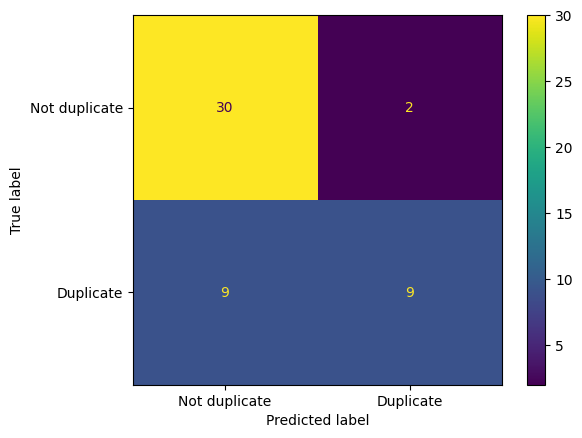

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not duplicate', 'Duplicate'])
disp.plot()
plt.show()

In [30]:
from sklearn import tree

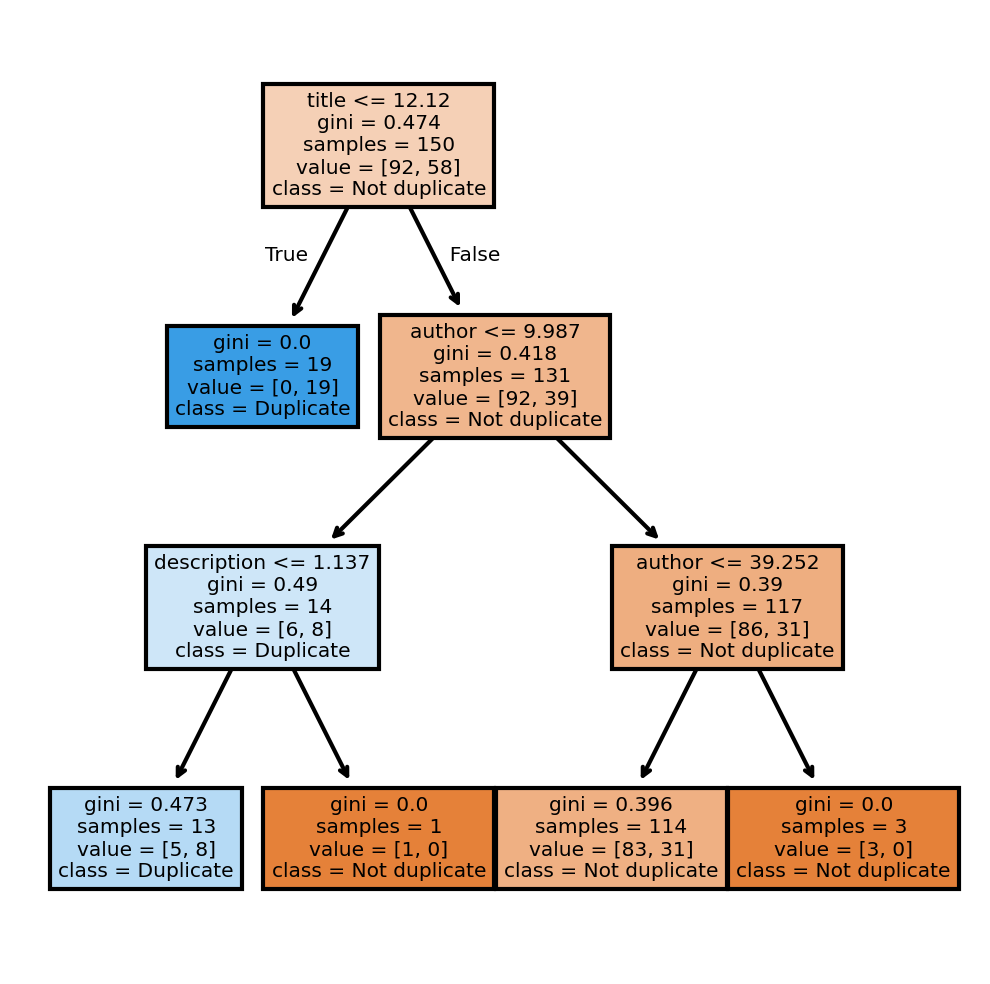

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

fn = ['title', 'author', 'description', 'publication']

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=['Not duplicate', 'Duplicate'],
               filled = True);